In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import numpy as np

import warnings
warnings.simplefilter('ignore')

In [2]:
# load the data
client_train = pd.read_csv('data/client_train.csv', low_memory=False)
invoice_train = pd.read_csv('data/invoice_train.csv', low_memory=False)
#concatenate to one df
df_train = pd.merge(client_train, invoice_train, how='left', on='client_id')

In [ ]:
client_train

In [6]:
df_train.isna().sum().sum()

0

In [19]:
fraud = client_train.groupby(['target'])['client_id'].count()

<Axes: xlabel='target'>

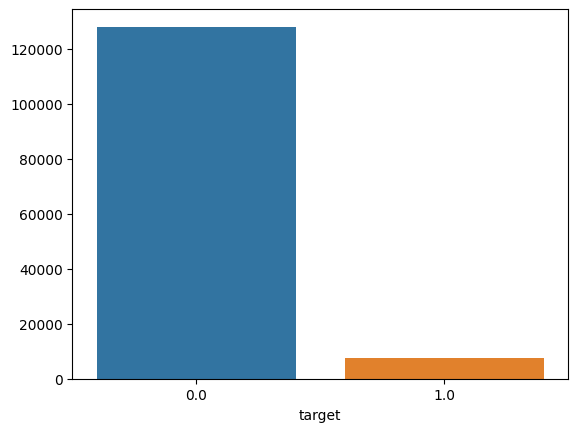

In [21]:
sns.barplot(x=fraud.index, y=fraud.values)

In [5]:
# First convert 'A' to a number (for example 99) or drop those rows
df_train['counter_statue'] = df_train['counter_statue'].replace('A', 99)

# Then convert the column to integer type
df_train['counter_statue'] = df_train['counter_statue'].astype(int)

# Now you can filter as before
df_train = df_train[~(df_train['counter_statue'] > 5)]

In [6]:
df_train['counter_statue'].unique()

array([0, 1, 5, 4, 3, 2])

<Axes: xlabel='client_id', ylabel='Count'>

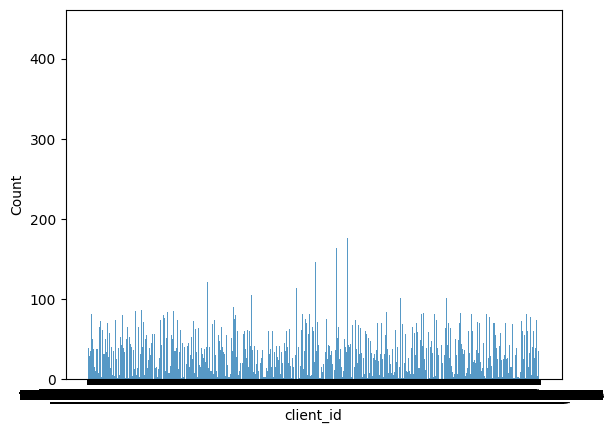

In [3]:
sns.histplot(df_train.client_id)

In [7]:
client_train.client_catg.unique()

array([11, 12, 51])

In [12]:
cat = client_train.groupby('client_catg').count().reset_index()

<Axes: xlabel='client_catg', ylabel='client_id'>

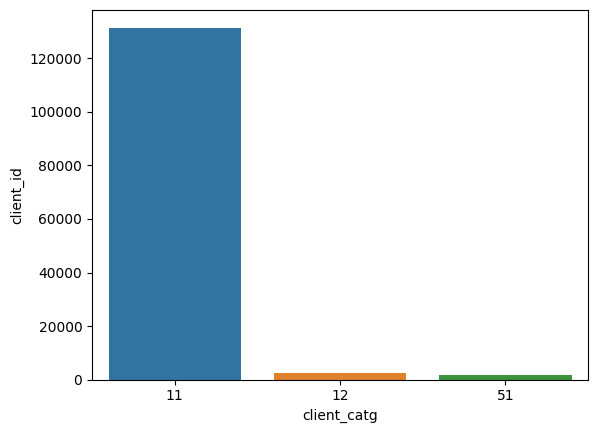

In [13]:
sns.barplot(y = cat.client_id, x = cat.client_catg)

In [16]:
client_train.creation_date = pd.to_datetime(client_train.creation_date, format='%d/%m/%Y')

In [19]:
yearly_groups = client_train.groupby(client_train.creation_date.dt.year).count()


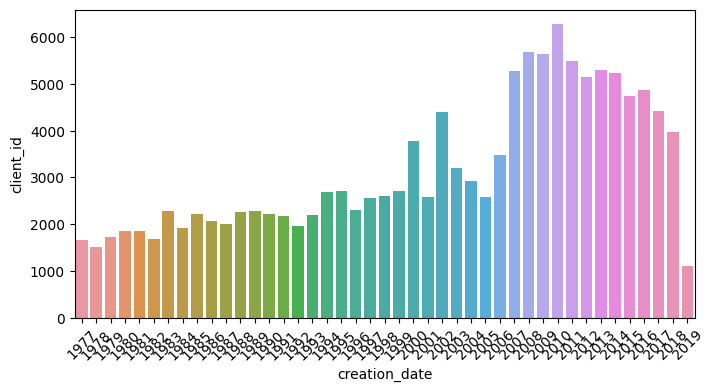

In [29]:
plt.figure(figsize=(8, 4))
sns.barplot(x = yearly_groups.index, y = yearly_groups.client_id)
plt.xticks(rotation=45)
plt.show()

In [32]:
region = client_train.groupby('region').count().reset_index()

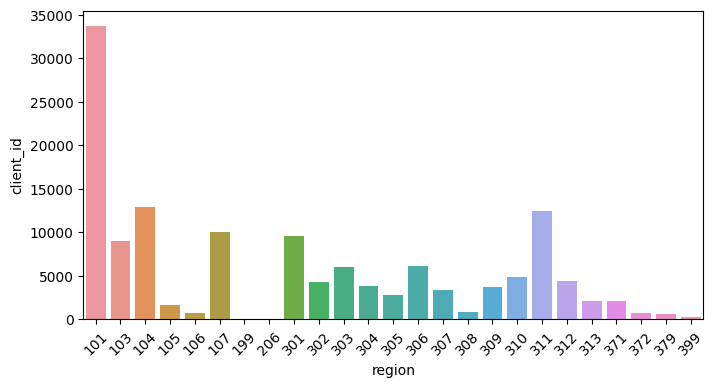

In [34]:
plt.figure(figsize=(8, 4))
sns.barplot(data=region, x='region', y='client_id')
plt.xticks(rotation=45)
plt.show()

<Axes: xlabel='target', ylabel='region'>

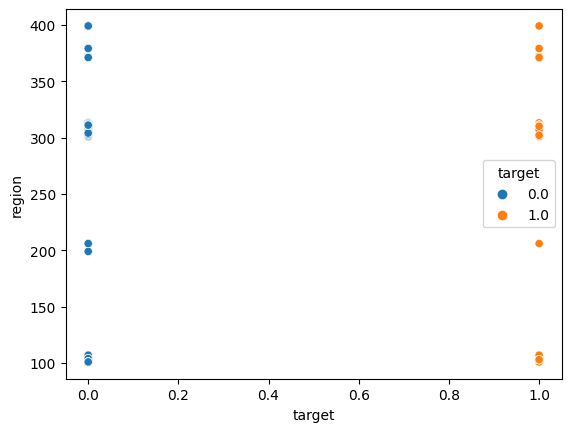

In [35]:
sns.scatterplot(data = client_train, x = 'target', y = 'region', hue = 'target')

<Axes: xlabel='target', ylabel='client_catg'>

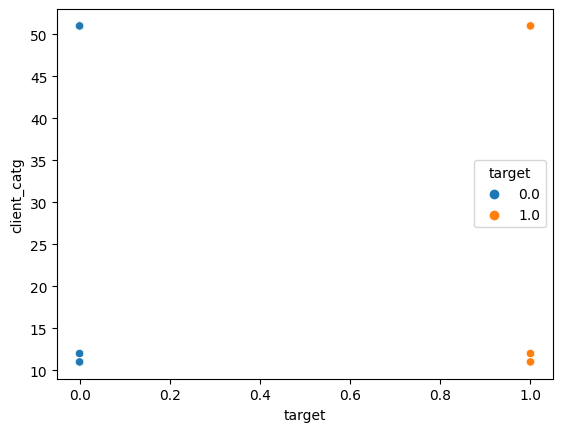

In [42]:
sns.scatterplot(data = client_train, x = 'target', y = 'client_catg', hue = 'target')

<Axes: xlabel='client_catg', ylabel='target'>

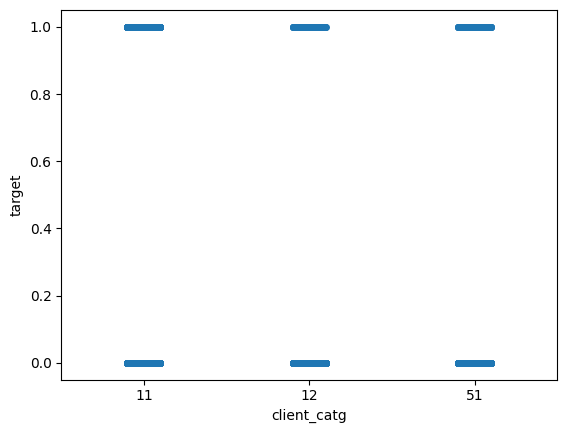

In [46]:
sns.stripplot(data=client_train, x='client_catg', y='target', jitter=True)

In [47]:
targetclientcatg = pd.pivot_table(client_train, columns=['client_catg', 'target'], aggfunc='count')

In [48]:
targetclientcatg

client_catg        11          12        51     
target            0.0   1.0   0.0 1.0   0.0  1.0
client_id      124303  7191  2229  92  1395  283
creation_date  124303  7191  2229  92  1395  283
disrict        124303  7191  2229  92  1395  283
region         124303  7191  2229  92  1395  283

<Axes: >

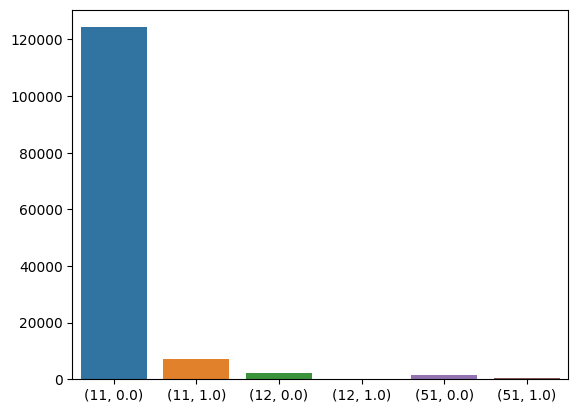

In [52]:
sns.barplot(data = targetclientcatg)

In [53]:
fraudsters = client_train[client_train['target'] == 1]

In [54]:
fraudsters.count()

disrict          7566
client_id        7566
client_catg      7566
region           7566
creation_date    7566
target           7566
dtype: int64

In [55]:
client_train.count()

disrict          135493
client_id        135493
client_catg      135493
region           135493
creation_date    135493
target           135493
dtype: int64

* total: 5.6% of fraudsters 
* in cat 11 5.5%, 95% of fraudsters
* in cat 12 3.9%, 1.2% of fraudsters
* in cat 51 16.7%, 3.7% of total fraudsters

In [67]:
tarif = pd.pivot_table(df_train, columns = ['tarif_type', 'target'], aggfunc='count')

In [69]:
tarif2= pd.pivot_table(df_train, columns = ['tarif_type'], aggfunc='count')

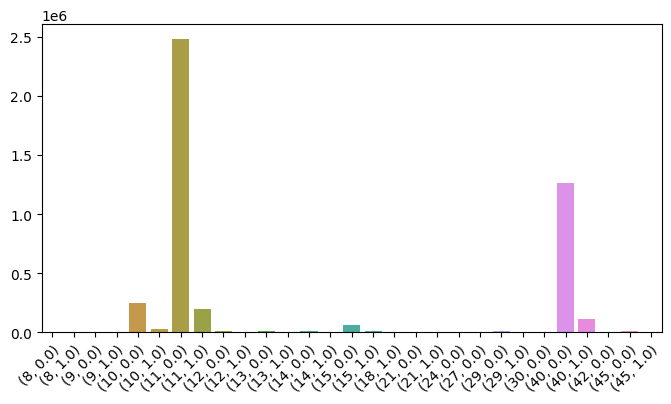

In [71]:
plt.figure(figsize=(8, 4))
sns.barplot(data = tarif)
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
plt.show()

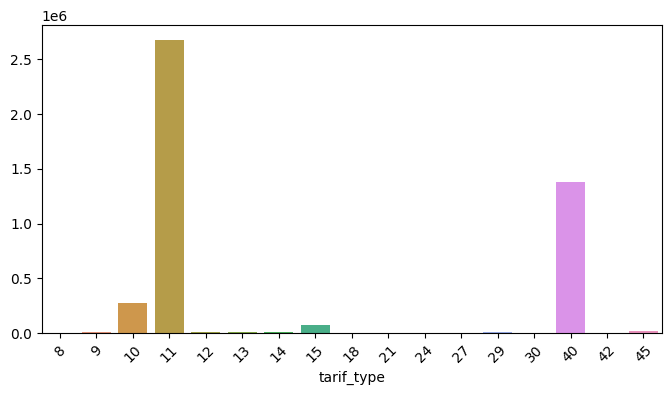

In [70]:
plt.figure(figsize=(8, 4))
sns.barplot(data = tarif2)
plt.xticks(rotation=45)
plt.show()

In [80]:
countercode = df_train.groupby('counter_code').count().reset_index()

In [85]:
countercode = pd.crosstab(df_train['counter_code'], df_train['target']).reset_index()

In [88]:
countercode.columns

Index(['counter_code', 0.0, 1.0], dtype='object', name='target')

In [90]:
df_melted = countercode.melt(id_vars='counter_code', 
                    value_vars=[0.0, 1.0], 
                    var_name='Target', 
                    value_name='Count')

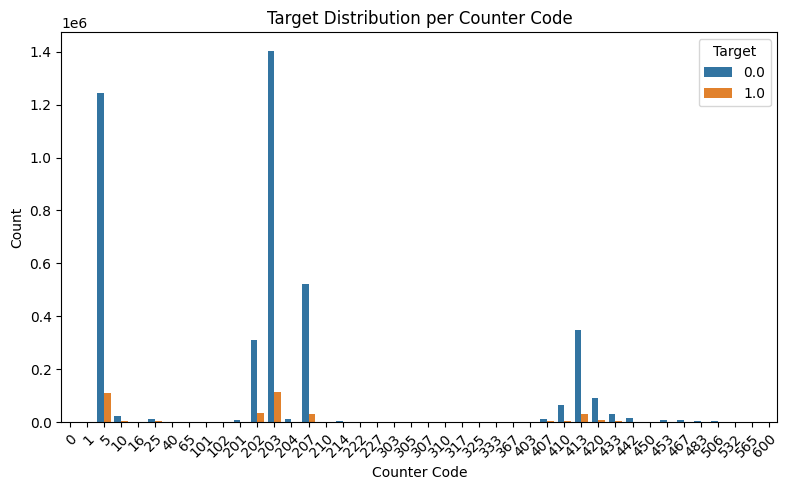

In [92]:

plt.figure(figsize=(8, 5))

sns.barplot(data=df_melted, x='counter_code', y='Count', hue='Target')

plt.title('Target Distribution per Counter Code')
plt.xlabel('Counter Code')
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [94]:
remarque = pd.crosstab(df_train['reading_remarque'], df_train['target']).reset_index()

In [98]:
remarque_melted = remarque.melt(id_vars='reading_remarque', 
                    value_vars=[0.0, 1.0], 
                    var_name='Target', 
                    value_name='Count')

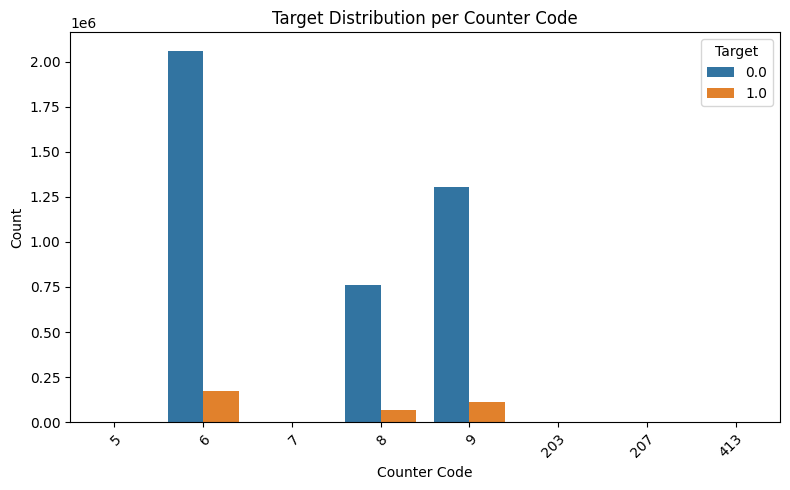

In [ ]:
plt.figure(figsize=(8, 5))

sns.barplot(data=remarque_melted, x='reading_remarque', y='Count', hue='Target')

plt.title('Target Distribution per Reading remark')
plt.xlabel('Counter Code')
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [101]:
df_sampled = df_train.sample(n=10000, random_state=42)

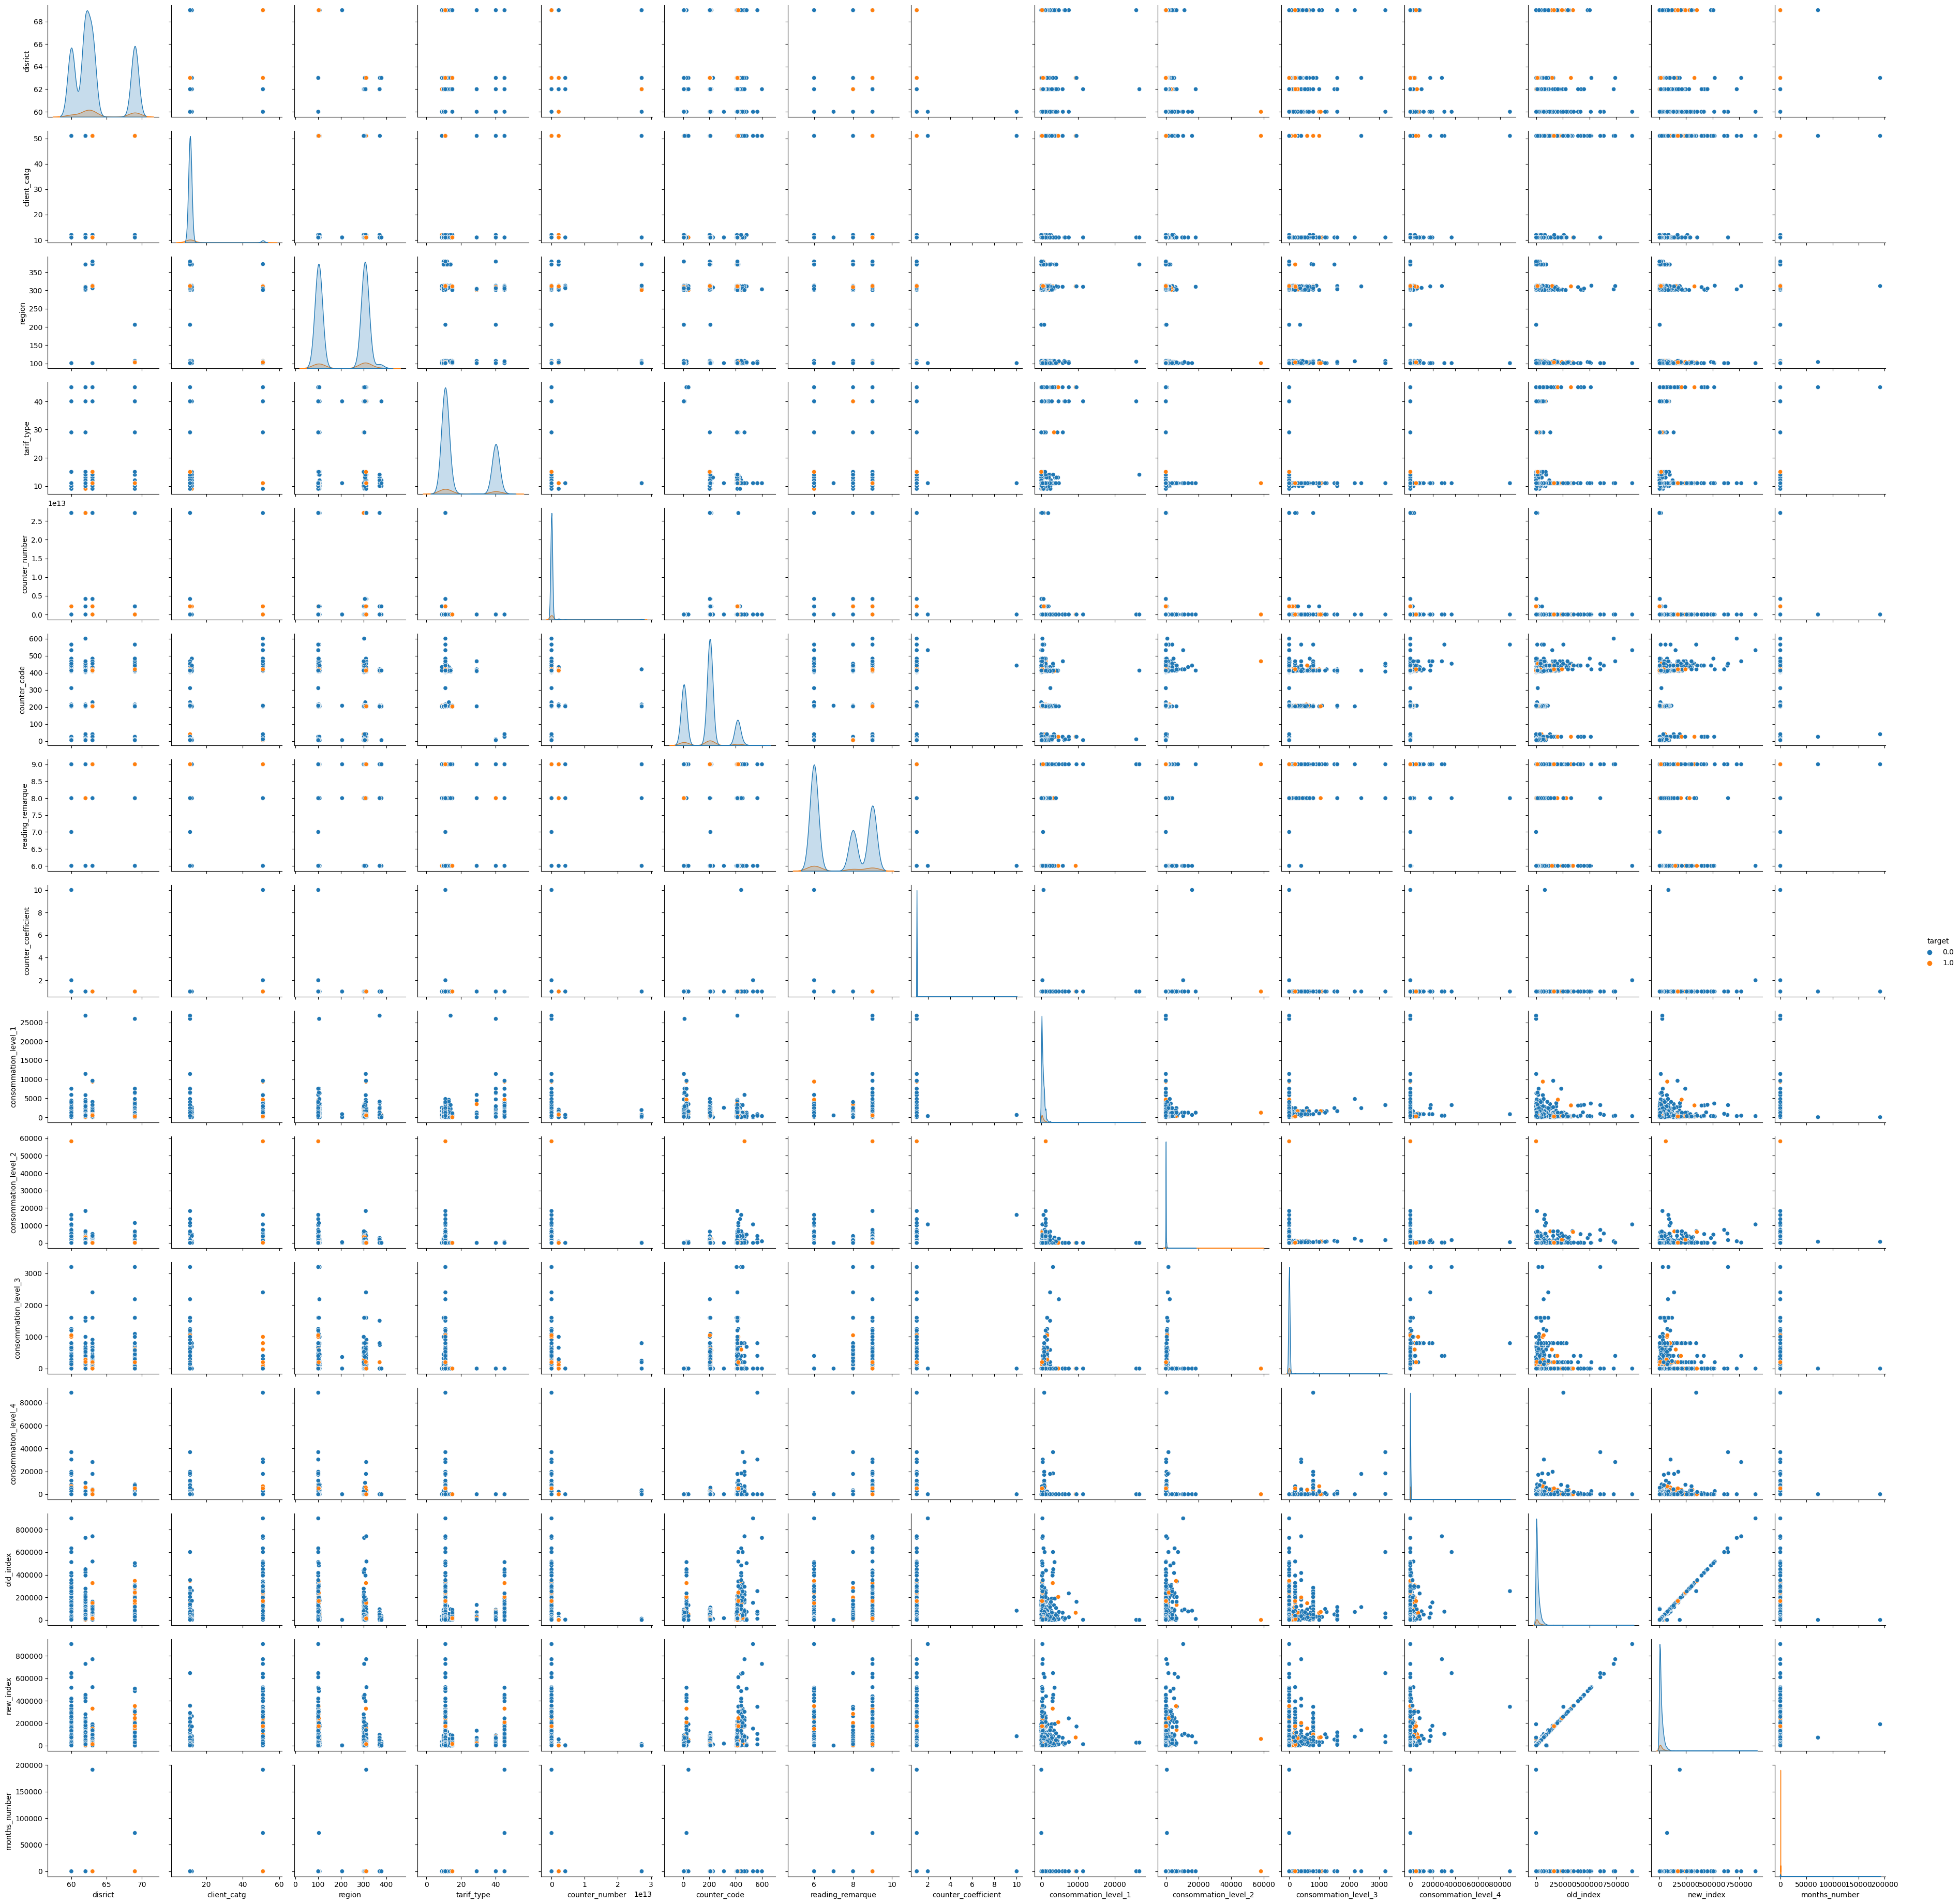

In [102]:
sns.pairplot(df_sampled, hue='target')

In [94]:
n = 10000
df_sample2 = pd.concat([
    df_train[df_train['target'] == 0].sample(n=n//2, random_state=42),
    df_train[df_train['target'] == 1].sample(n=n//2, random_state=42)
])

In [ ]:
sns.pairplot(df_sample2, hue='target')

In [96]:
countercoeff = pd.crosstab(df_train['counter_coefficient'], df_train['target']).reset_index()

In [90]:
df_sample2.counter_coefficient.unique()

array([ 1,  2, 40])

In [91]:
df_train.counter_coefficient.unique()

array([ 1,  3,  0, 10,  4, 33, 50, 20,  2, 40, 30,  5, 11])

In [97]:
counter_melted = countercoeff.melt(id_vars='counter_coefficient', 
                    value_vars=[0.0, 1.0], 
                    var_name='Target', 
                    value_name='Count')

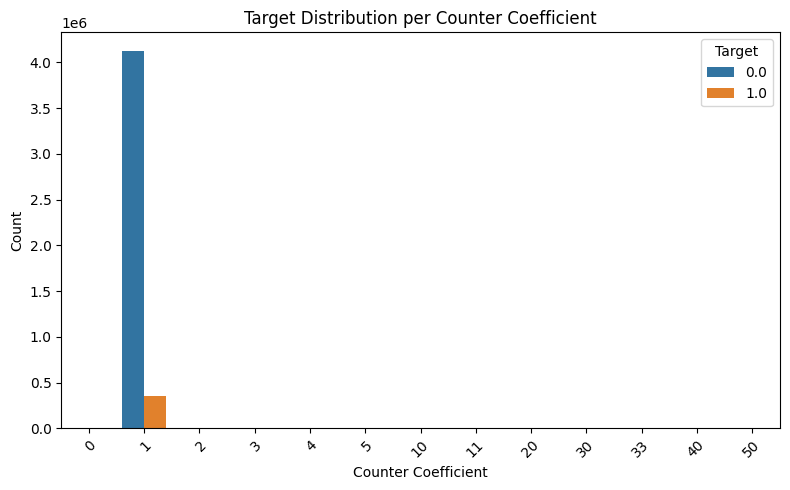

In [98]:

plt.figure(figsize=(8, 5))

sns.barplot(data=counter_melted, x='counter_coefficient', y='Count', hue='Target')

plt.title('Target Distribution per Counter Coefficient')
plt.xlabel('Counter Coefficient')
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

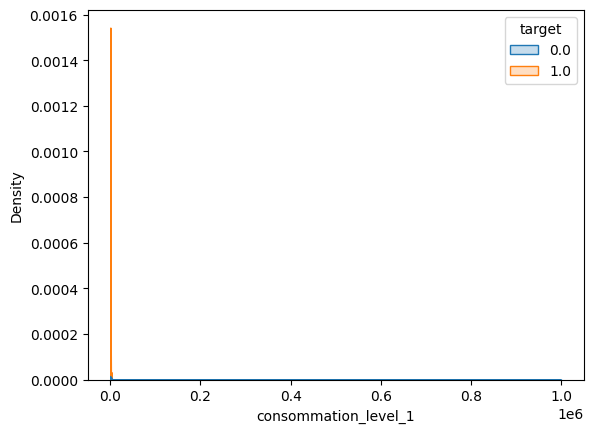

In [74]:
sns.kdeplot(data=df_train, x='consommation_level_1', hue='target', fill=True, common_norm=False)
plt.show()

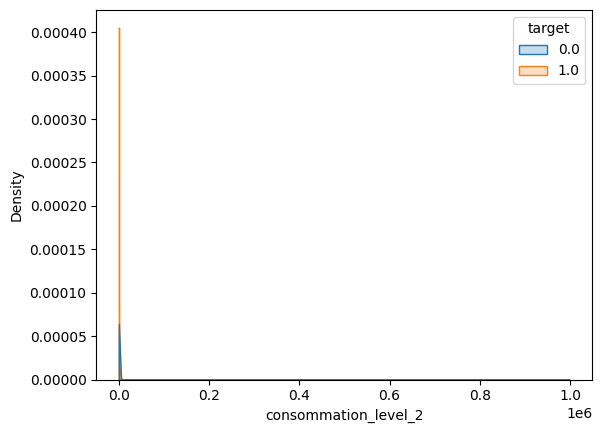

In [75]:
sns.kdeplot(data=df_train, x='consommation_level_2', hue='target', fill=True, common_norm=False)
plt.show()

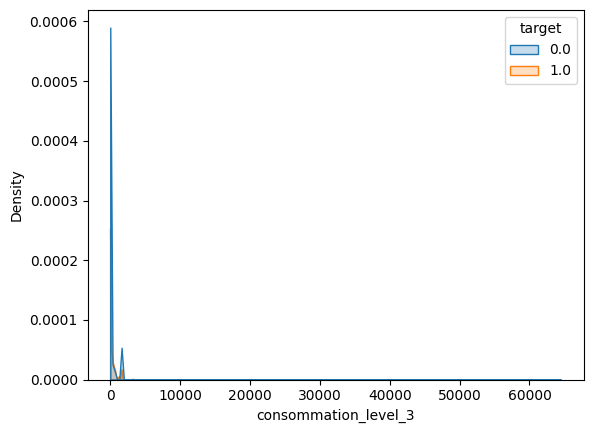

In [76]:
sns.kdeplot(data=df_train, x='consommation_level_3', hue='target', fill=True, common_norm=False)
plt.show()

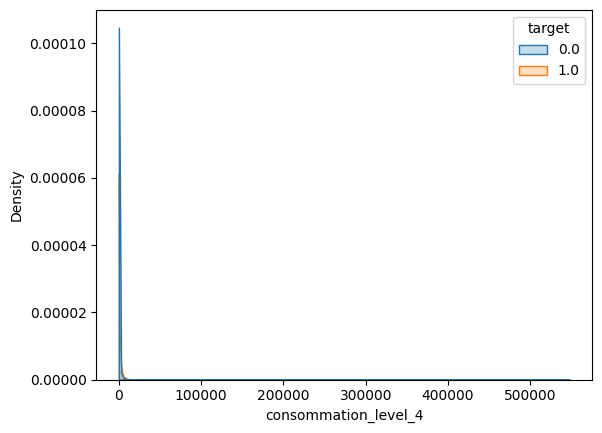

In [77]:
sns.kdeplot(data=df_train, x='consommation_level_4', hue='target', fill=True, common_norm=False)
plt.show()

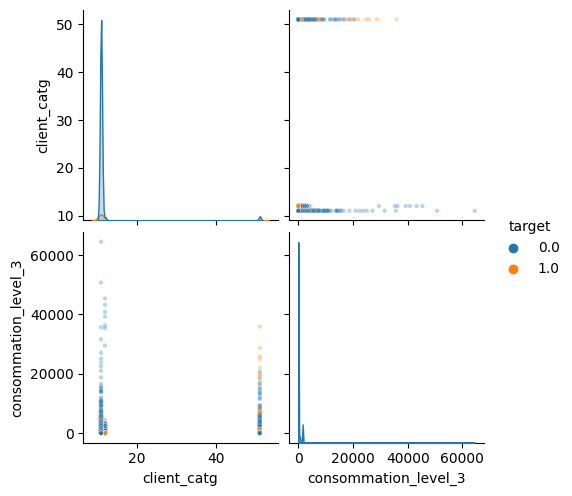

In [ ]:
selected_features2 = ['client_catg', 'consommation_level_3', 'target']
sns.pairplot(df_train[selected_features2], hue='target', plot_kws={'alpha': 0.5})

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
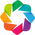

In [21]:
import datashader as ds
import datashader.transfer_functions as tf
from datashader import Canvas
from datashader.transfer_functions import dynspread
from datashader.transfer_functions import set_background
import holoviews as hv
hv.extension('bokeh')
import hvplot.pandas


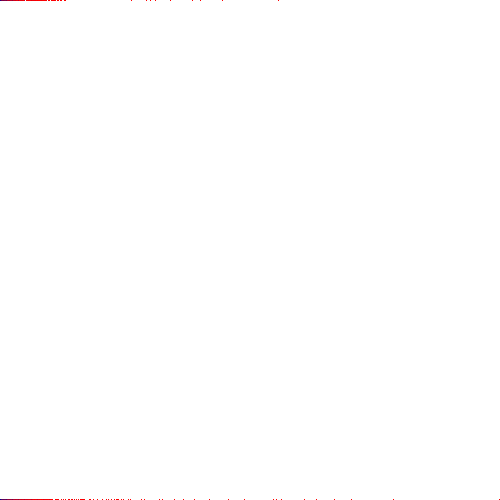

In [19]:
cvs = Canvas(plot_width=500, plot_height=500)
agg = cvs.points(df_train, 'consommation_level_3', 'target')
img = tf.shade(agg, cmap=["red", "darkblue"], how='log')
img = dynspread(img, threshold=0.5, max_px=5)
img = set_background(img, "white")
img

In [22]:
features = list(df_train.columns)

In [30]:
plot_grid = hv.Layout([
    df_train.hvplot.scatter(x=x, y=y, datashade=True)#.opts(width=200, height=200)
    for y in features for x in features
]).cols(len(features))

plot_grid

Invoked as dynamic_operation(height=300, scale=1.0, width=700, x_range=None, y_range=None)
Invoked as dynamic_operation(height=300, scale=1.0, width=700, x_range=None, y_range=None)


ValueError: conflicting sizes for dimension 'disrict': length 700 on the data but length 300 on coordinate 'disrict'

:Layout
   .DynamicMap.I           :DynamicMap   []
   .DynamicMap.II          :DynamicMap   []
   .DynamicMap.III         :DynamicMap   []
   .DynamicMap.IV          :DynamicMap   []
   .DynamicMap.V           :DynamicMap   []
   .DynamicMap.VI          :DynamicMap   []
   .DynamicMap.VII         :DynamicMap   []
   .DynamicMap.VIII        :DynamicMap   []
   .DynamicMap.IX          :DynamicMap   []
   .DynamicMap.X           :DynamicMap   []
   .DynamicMap.XI          :DynamicMap   []
   .DynamicMap.XII         :DynamicMap   []
   .DynamicMap.XIII        :DynamicMap   []
   .DynamicMap.XIV         :DynamicMap   []
   .DynamicMap.XV          :DynamicMap   []
   .DynamicMap.XVI         :DynamicMap   []
   .DynamicMap.XVII        :DynamicMap   []
   .DynamicMap.XVIII       :DynamicMap   []
   .DynamicMap.XIX         :DynamicMap   []
   .DynamicMap.XX          :DynamicMap   []
   .DynamicMap.XXI         :DynamicMap   []
   .DynamicMap.XXII        :DynamicMap   []
   .DynamicMap.XXIII    

In [40]:
status = pd.crosstab(df_train.counter_statue, df_train.target).reset_index()

In [41]:
status_melted = status.melt(id_vars='counter_statue', 
                    value_vars=[0.0, 1.0], 
                    var_name='Target', 
                    value_name='Count')

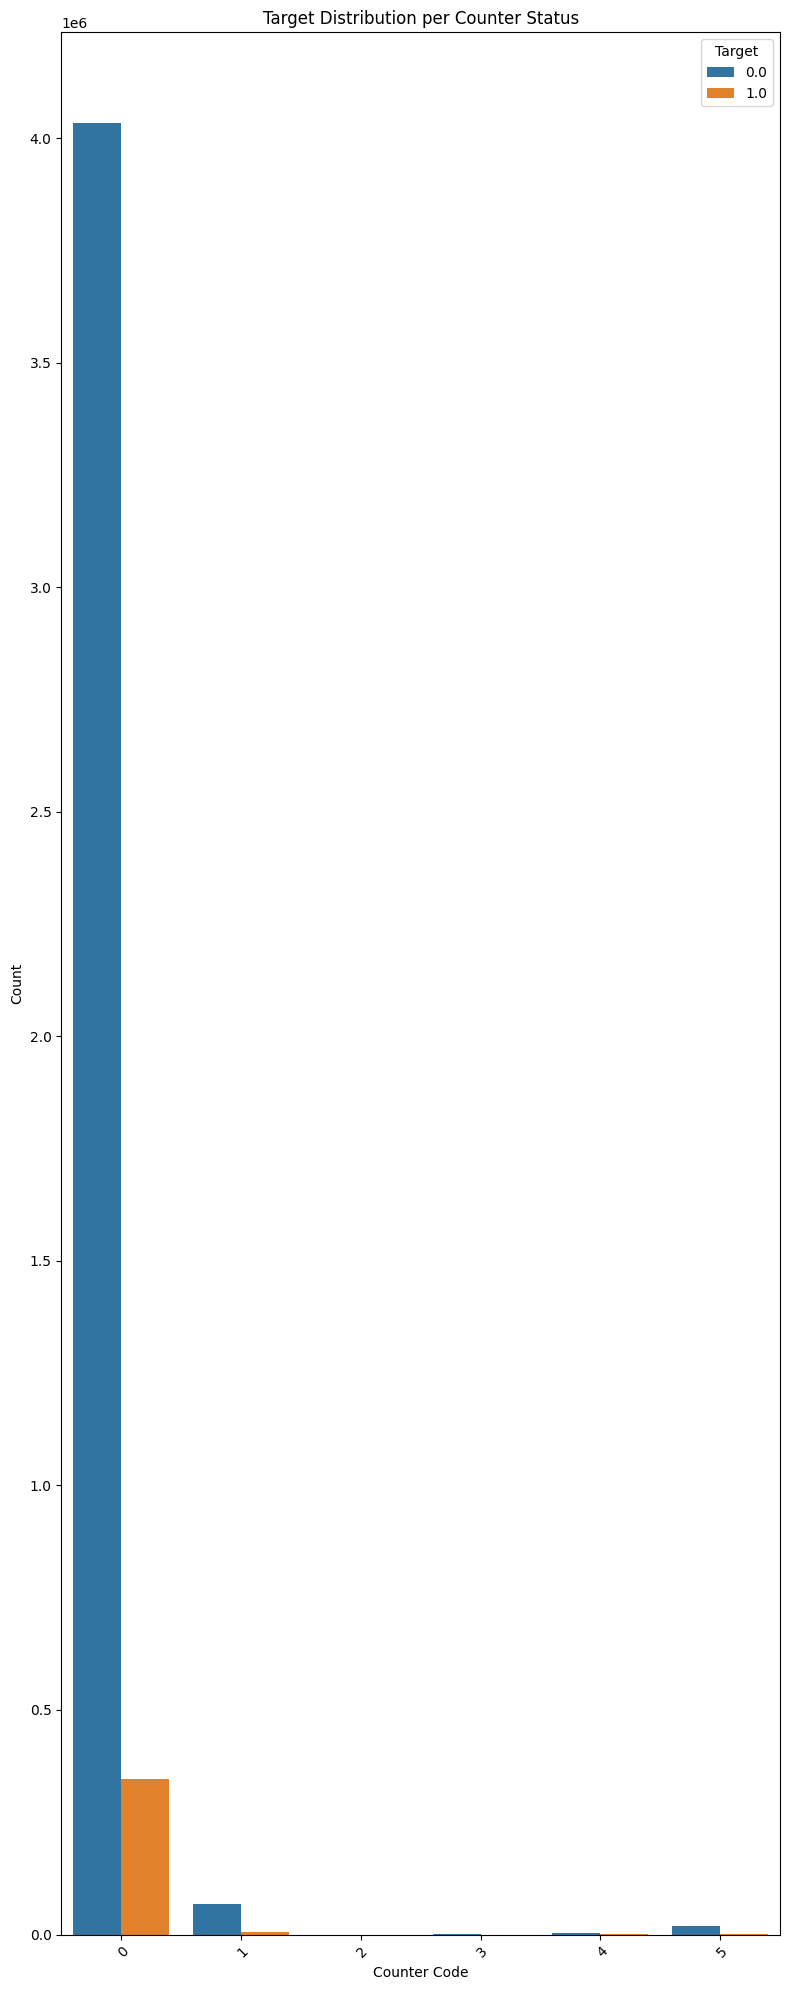

In [43]:
plt.figure(figsize=(8, 20))

sns.barplot(data=status_melted, x='counter_statue', y='Count', hue='Target')

plt.title('Target Distribution per Counter Status')
plt.xlabel('Counter Code')
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [ ]:
# check if sum of the consommation_level values is equal to the difference between old index and new index
# Create a mask for the condition
mask = (df_train['consommation_level_1'] + 
        df_train['consommation_level_2'] + 
        df_train['consommation_level_3'] + 
        df_train['consommation_level_4']) != (df_train['new_index'] - df_train['old_index'])

# Create a new dataframe with only the inconsistent rows
inconsistent_readings = df_train[mask][['client_id', 'old_index', 'new_index', 
                                      'consommation_level_1', 'consommation_level_2',
                                      'consommation_level_3', 'consommation_level_4']]

# Add a column showing the difference between sum and meter readings
inconsistent_readings['sum_levels'] = (inconsistent_readings['consommation_level_1'] + 
                                     inconsistent_readings['consommation_level_2'] + 
                                     inconsistent_readings['consommation_level_3'] + 
                                     inconsistent_readings['consommation_level_4'])
inconsistent_readings['meter_diff'] = (inconsistent_readings['new_index'] - 
                                     inconsistent_readings['old_index'])
inconsistent_readings['discrepancy'] = inconsistent_readings['sum_levels'] - inconsistent_readings['meter_diff']

# Display the results
print(f"Number of inconsistent readings: {len(inconsistent_readings)}")
display(inconsistent_readings)

In [44]:
# check if sum of the consommation_level values is equal to the difference between old index and new index
# Create a mask for the condition
mask = (df_train['consommation_level_1'] + 
        df_train['consommation_level_2'] + 
        df_train['consommation_level_3'] + 
        df_train['consommation_level_4']) != (df_train['new_index'] - df_train['old_index'])

# Create a new dataframe with only the inconsistent rows
inconsistent_readings = df_train[mask]

In [52]:
inconsistent_readings['reading_remarque'].unique()

array([8, 6, 9])

In [51]:
print(f"Number of inconsistent readings: {len(inconsistent_readings)}")
print(f"Number of fraudsters in inconsistent readings: {len(inconsistent_readings[inconsistent_readings['target'] == 1])}")
print(f"Percentage of fraudsters in inconsistent readings: {(len(inconsistent_readings[inconsistent_readings['target'] == 1])/len(inconsistent_readings))*100}")

Number of inconsistent readings: 18902
Number of fraudsters in inconsistent readings: 1509
Percentage of fraudsters in inconsistent readings: 7.983282192360597


In [54]:
df_train.invoice_date = pd.to_datetime(df_train.invoice_date, format='%Y-%m-%d')

In [63]:
# Calculate time differences between consecutive invoices for each client
df_train = df_train.sort_values(['client_id', 'invoice_date'])

# Calculate months between dates using periods
df_train['invoice_diff'] = (df_train.groupby('client_id')['invoice_date']
                          .diff()
                          .apply(lambda x: x.days/30 if pd.notnull(x) else None))

# Modified aggregation function to handle empty modes
def safe_mode(x):
    if x.empty:
        return None
    mode_result = x.mode()
    return mode_result.iloc[0] if not mode_result.empty else None

# Get the mode of invoice differences and months_number for each client
invoice_mode = df_train.groupby('client_id')['invoice_diff'].agg(safe_mode)
months_mode = df_train.groupby('client_id')['months_number'].agg(safe_mode)

# Compare the modes
comparison = pd.DataFrame({
    'invoice_diff_mode': invoice_mode,
    'months_number_mode': months_mode
})

# Add a column indicating if they match (within a small tolerance due to floating point)
comparison['matches'] = np.isclose(comparison['invoice_diff_mode'], 
                               comparison['months_number_mode'], 
                               rtol=0.1,
                               equal_nan=True)  # handle NaN values

print("Number of matching clients:", comparison['matches'].sum())
print("Number of non-matching clients:", (~comparison['matches']).sum())
print("\nSample of non-matching cases:")
display(comparison[~comparison['matches']].head())

Number of matching clients: 32584
Number of non-matching clients: 102907

Sample of non-matching cases:


,invoice_diff_mode,months_number_mode,matches
client_id,,,
train_Client_1,1.866667,4,False
train_Client_1000,2.300000,4,False
train_Client_10000,0.000000,4,False
train_Client_100000,0.000000,4,False
train_Client_100001,0.000000,4,False


In [67]:
# Calculate time differences between consecutive invoices for each client
df_train = df_train.sort_values(['client_id', 'invoice_date'])

# Calculate months between dates and round to nearest integer
df_train['invoice_diff'] = (df_train.groupby('client_id')['invoice_date']
                          .diff()
                          .apply(lambda x: round(x.days/30) if pd.notnull(x) else None))

# Modified aggregation function to calculate mean instead of mode
def safe_mean(x):
    if x.empty:
        return None
    return round(x.mean()) if not pd.isna(x.mean()) else None

# Get the mean of invoice differences and months_number for each client
invoice_mean = df_train.groupby('client_id')['invoice_diff'].agg(safe_mean)
months_mean = df_train.groupby('client_id')['months_number'].agg(safe_mean)

# Compare the means
comparison = pd.DataFrame({
    'invoice_mean_rounded': invoice_mean,
    'months_number_mean_rounded': months_mean
})

# Add a column indicating if they match exactly (since we rounded the values)
comparison['matches'] = comparison['invoice_mean_rounded'] == comparison['months_number_mean_rounded']

print("Number of matching clients:", comparison['matches'].sum())
print("Number of non-matching clients:", (~comparison['matches']).sum())
print("\nSample of non-matching cases:")
display(comparison[~comparison['matches']].head())

Number of matching clients: 39403
Number of non-matching clients: 96088

Sample of non-matching cases:


,invoice_mean_rounded,months_number_mean_rounded,matches
client_id,,,
train_Client_10,10.0,6,False
train_Client_100,5.0,4,False
train_Client_10000,3.0,4,False
train_Client_100000,2.0,4,False
train_Client_100001,2.0,4,False


In [132]:
# check if sum of the consommation_level values is equal to the difference between old index and new index
# Create a mask for the condition
mask = (df_train['consommation_level_1'] + 
        df_train['consommation_level_2'] + 
        df_train['consommation_level_3'] + 
        df_train['consommation_level_4']) != (df_train['new_index'] - df_train['old_index'])

# Create a new row in the dataframe
df_train['meter_broken'] = mask.astype(int)

<Axes: xlabel='new_index', ylabel='old_index'>

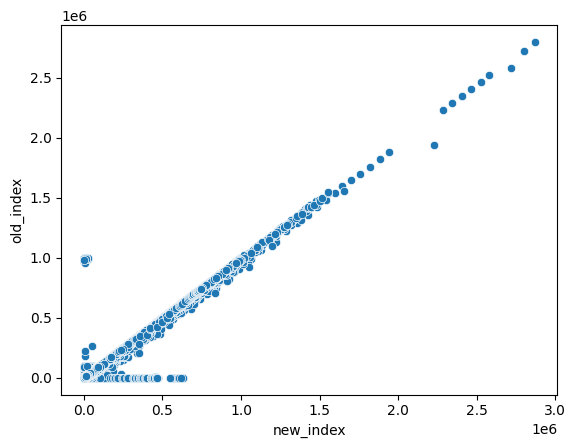

In [99]:
sns.scatterplot(data=df_train, x='new_index', y='old_index')

<Axes: xlabel='consommation_level_1', ylabel='old_index'>

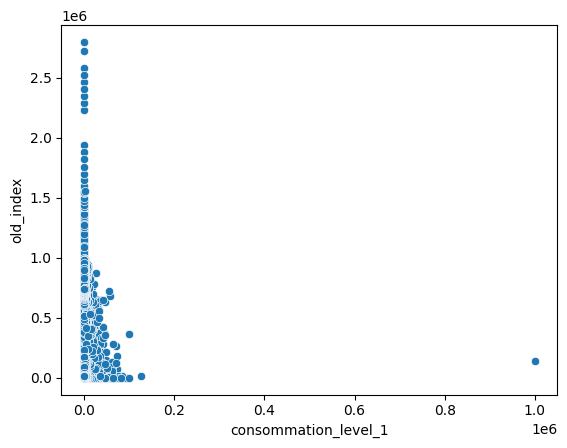

In [100]:
sns.scatterplot(data=df_train, x='consommation_level_1', y='old_index')

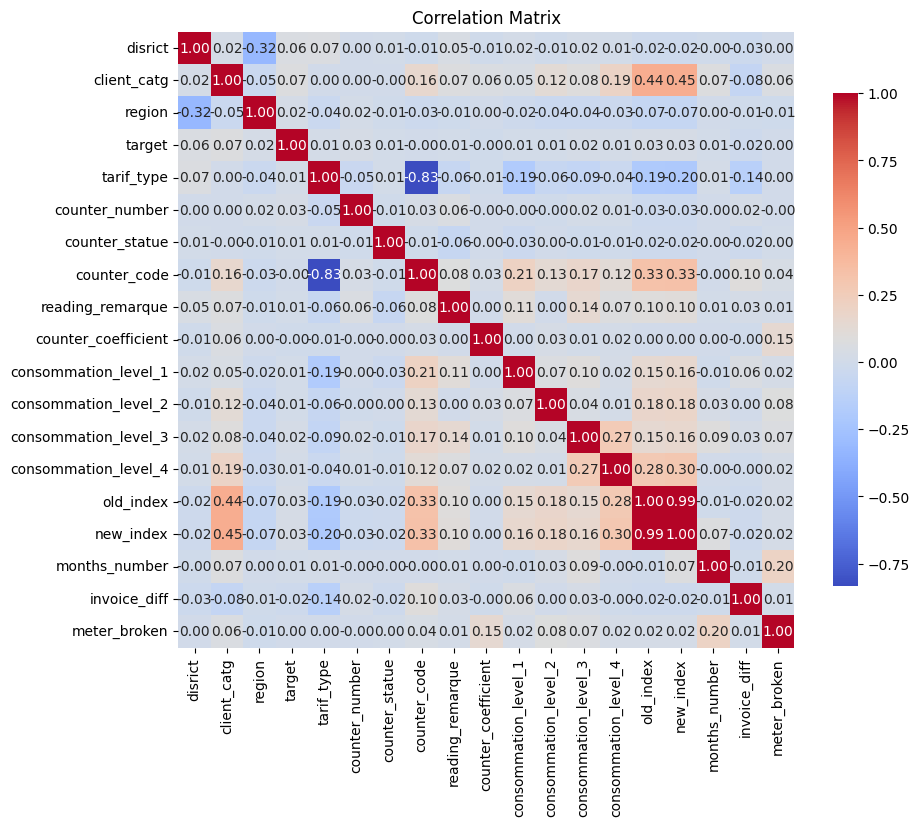

In [128]:
corr = df_train.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar_kws={"shrink": .8})
plt.title("Correlation Matrix")
plt.show()

In [ ]:
import data_cleaning_function as dcf

In [111]:
dcf.data_cleaning(df_train)

,disrict,client_id,client_catg,region,creation_date,target,invoice_date,tarif_type,counter_number,counter_statue,...,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type,invoice_diff,meter_broken
22,60,train_Client_0,11,101,1994-12-31,0.0,2005-10-17,11,1335667,0,...,124,0,0,0,3685,3809,4,ELEC,NaN,0
23,60,train_Client_0,11,101,1994-12-31,0.0,2006-02-24,11,1335667,0,...,141,0,0,0,3809,3950,4,ELEC,4.0,0
24,60,train_Client_0,11,101,1994-12-31,0.0,2006-06-23,11,1335667,0,...,162,0,0,0,3950,4112,4,ELEC,4.0,0
25,60,train_Client_0,11,101,1994-12-31,0.0,2006-10-18,11,1335667,0,...,159,0,0,0,4112,4271,4,ELEC,4.0,0
28,60,train_Client_0,11,101,1994-12-31,0.0,2007-02-26,11,1335667,0,...,182,0,0,0,4271,4453,4,ELEC,4.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4476737,63,train_Client_99997,11,311,2011-11-22,0.0,2018-06-02,11,262195,0,...,386,0,0,0,6528,6914,4,ELEC,0.0,0
4476736,63,train_Client_99997,11,311,2011-11-22,0.0,2019-07-02,11,262195,0,...,1075,0,0,0,7430,8505,8,ELEC,13.0,0
4476743,63,train_Client_99997,11,311,2011-11-22,0.0,2019-11-06,11,262195,0,...,578,0,0,0,8505,9083,4,ELEC,4.0,0
4476744,60,train_Client_99998,11,101,1993-12-22,0.0,2005-08-19,10,1253571,0,...,400,135,0,0,3197,3732,8,ELEC,NaN,0


In [112]:
df_train.columns

Index(['disrict', 'client_id', 'client_catg', 'region', 'creation_date',
       'target', 'invoice_date', 'tarif_type', 'counter_number',
       'counter_statue', 'counter_code', 'reading_remarque',
       'counter_coefficient', 'consommation_level_1', 'consommation_level_2',
       'consommation_level_3', 'consommation_level_4', 'old_index',
       'new_index', 'months_number', 'counter_type', 'invoice_diff',
       'meter_broken'],
      dtype='object')

In [115]:
for columns in df_train.columns:
    print(f"aggs['{columns}'] \t\t\t = ['mean']")

aggs['disrict'] 			 = ['mean']
aggs['client_id'] 			 = ['mean']
aggs['client_catg'] 			 = ['mean']
aggs['region'] 			 = ['mean']
aggs['creation_date'] 			 = ['mean']
aggs['target'] 			 = ['mean']
aggs['invoice_date'] 			 = ['mean']
aggs['tarif_type'] 			 = ['mean']
aggs['counter_number'] 			 = ['mean']
aggs['counter_statue'] 			 = ['mean']
aggs['counter_code'] 			 = ['mean']
aggs['reading_remarque'] 			 = ['mean']
aggs['counter_coefficient'] 			 = ['mean']
aggs['consommation_level_1'] 			 = ['mean']
aggs['consommation_level_2'] 			 = ['mean']
aggs['consommation_level_3'] 			 = ['mean']
aggs['consommation_level_4'] 			 = ['mean']
aggs['old_index'] 			 = ['mean']
aggs['new_index'] 			 = ['mean']
aggs['months_number'] 			 = ['mean']
aggs['counter_type'] 			 = ['mean']
aggs['invoice_diff'] 			 = ['mean']
aggs['meter_broken'] 			 = ['mean']


In [118]:
df_train.groupby('client_id')['counter_number'].nunique().sort_values(ascending=False)

client_id
train_Client_101771    8
train_Client_28793     8
train_Client_7602      8
train_Client_28788     7
train_Client_135012    7
                      ..
train_Client_33239     1
train_Client_33233     1
train_Client_33229     1
train_Client_33226     1
train_Client_99999     1
Name: counter_number, Length: 135491, dtype: int64

In [ ]:
pd.DataFrame(df_train.groupby('client_id').['counter_number']nunique()

,disrict,client_catg,region,creation_date,target,invoice_date,tarif_type,counter_number,counter_statue,counter_code,...,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type,invoice_diff,meter_broken
client_id,,,,,,,,,,,,,,,,,,,,,
train_Client_10000,1,1,1,1,1,29,2,2,1,2,...,42,4,2,1,45,46,5,2,9,1
train_Client_100000,1,1,1,1,1,20,2,2,2,2,...,37,2,1,1,37,38,3,2,3,1
train_Client_100001,1,1,1,1,1,40,2,2,2,2,...,65,3,1,1,71,76,3,2,10,1
train_Client_100004,1,1,1,1,1,8,2,2,1,2,...,12,1,1,1,12,13,2,2,3,1
train_Client_100005,1,1,1,1,1,38,2,3,1,2,...,67,10,1,1,75,74,2,2,11,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
train_Client_99992,1,1,1,1,1,12,2,2,1,2,...,13,2,2,1,13,13,4,2,5,1
train_Client_99993,1,1,1,1,1,25,2,2,2,2,...,15,21,1,1,32,34,3,2,10,1
train_Client_99995,1,1,1,1,1,40,2,3,2,2,...,2,1,1,1,2,2,3,2,4,2


In [127]:
pd.DataFrame(df_train.groupby('client_id').nunique(['counter_number'])).query('counter_number > 1 and target == 0')

,disrict,client_catg,region,creation_date,target,invoice_date,tarif_type,counter_number,counter_statue,counter_code,...,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type,invoice_diff,meter_broken
client_id,,,,,,,,,,,,,,,,,,,,,


In [ ]:
def aggregate_by_client_id(invoice_data):
    aggs = {}
    aggs['disrict'] 			 = ['mode']
    #aggs['client_id'] 			 = ['mean']
    aggs['client_catg'] 	     = ['mode']
    aggs['region'] 			     = ['mode']
    aggs['creation_date'] 		 = ['mode']
    aggs['target'] 			     = ['mode']
    #aggs['invoice_date'] 	     = ['mean']
    aggs['tarif_type'] 			 = ['mode']
    #aggs['counter_number'] 	     = ['nunique'] # to count the number of different counters per client
    aggs['counter_statue'] 	     = ['mode'] # can be different values for different counters
    aggs['counter_code'] 	     = ['mode'] # another option would be using dummy values to see if category present for customer. We do not know what this means
    aggs['reading_remarque'] 	 = ['mode']
    aggs['counter_coefficient'] 	= ['mode']
    aggs['consommation_level_1'] 	= ['mean']
    aggs['consommation_level_2'] 	= ['mean']
    aggs['consommation_level_3'] 	= ['mean']
    aggs['consommation_level_4'] 	= ['mean']
    #aggs['old_index'] 			 = ['mean'] # we drop these because of correlation to each other and we will use it for feature engineering later
    #aggs['new_index'] 			 = ['mean']
    aggs['months_number'] 			 = ['mode']
    aggs['counter_type'] 			 = ['mode']
    #aggs['invoice_diff'] 			 = ['mean'] # feature engineering
    #aggs['meter_broken'] 			 = ['mode'] # feature engineering

    agg_trans = invoice_data.groupby(['client_id']).agg(aggs)
    agg_trans.columns = ['_'.join(col).strip() for col in agg_trans.columns.values]
    agg_trans.reset_index(inplace=True)

    df = (invoice_data.groupby('client_id')
            .size()
            .reset_index(name='{}transactions_count'.format('1')))
    return pd.merge(df, agg_trans, on='client_id', how='left')

In [7]:
# aggregating in safe mode

def aggregate_by_client_id(invoice_data):
    # Custom function to get the most common value safely
    def safe_mode(x):
        if x.empty:
            return None
        mode_vals = x.mode()
        return mode_vals.iloc[0] if not mode_vals.empty else None

    aggs = {}
    aggs['disrict']             = [safe_mode]
    #aggs['client_id']         = ['mean']
    aggs['client_catg']         = [safe_mode]
    aggs['region']              = [safe_mode]
    aggs['creation_date']       = [safe_mode]
    aggs['target']              = [safe_mode]
    #aggs['invoice_date']      = ['mean']
    aggs['tarif_type']         = [safe_mode]
    aggs['counter_statue']      = [safe_mode]
    aggs['counter_code']        = [safe_mode]
    aggs['reading_remarque']    = [safe_mode]
    aggs['counter_coefficient'] = [safe_mode]
    aggs['consommation_level_1'] = ['mean']
    aggs['consommation_level_2'] = ['mean']
    aggs['consommation_level_3'] = ['mean']
    aggs['consommation_level_4'] = ['mean']
    aggs['months_number']       = [safe_mode]
    aggs['counter_type']        = [safe_mode]

    agg_trans = invoice_data.groupby(['client_id']).agg(aggs)
    agg_trans.columns = ['_'.join(col).strip() for col in agg_trans.columns.values]
    agg_trans.reset_index(inplace=True)

    df = (invoice_data.groupby('client_id')
            .size()
            .reset_index(name='{}transactions_count'.format('1')))
    return pd.merge(df, agg_trans, on='client_id', how='left')

In [8]:
aggregate_by_client_id(df_train)

,client_id,1transactions_count,disrict_safe_mode,client_catg_safe_mode,region_safe_mode,creation_date_safe_mode,target_safe_mode,tarif_type_safe_mode,counter_statue_safe_mode,counter_code_safe_mode,reading_remarque_safe_mode,counter_coefficient_safe_mode,consommation_level_1_mean,consommation_level_2_mean,consommation_level_3_mean,consommation_level_4_mean,months_number_safe_mode,counter_type_safe_mode
0,train_Client_0,35,60,11,101,31/12/1994,0.0,11,0,203,6,1,352.400000,10.571429,0.000000,0.000000,4,ELEC
1,train_Client_1,37,69,11,107,29/05/2002,0.0,11,0,203,6,1,557.540541,0.000000,0.000000,0.000000,4,ELEC
2,train_Client_10,18,62,11,301,13/03/1986,0.0,11,0,203,6,1,798.611111,37.888889,0.000000,0.000000,4,ELEC
3,train_Client_100,20,69,11,105,11/07/1996,0.0,11,0,413,6,1,1.200000,0.000000,0.000000,0.000000,4,ELEC
4,train_Client_1000,14,62,11,303,14/10/2014,0.0,11,0,207,9,1,663.714286,104.857143,117.357143,36.714286,4,ELEC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135486,train_Client_99995,71,62,11,304,26/07/2004,0.0,11,0,207,6,1,1.957746,0.000000,0.000000,0.000000,4,ELEC
135487,train_Client_99996,41,63,11,311,25/10/2012,0.0,40,0,5,9,1,185.853659,0.756098,0.000000,0.000000,4,GAZ
135488,train_Client_99997,36,63,11,311,22/11/2011,0.0,11,0,207,9,1,273.083333,0.000000,0.000000,0.000000,4,ELEC
135489,train_Client_99998,2,60,11,101,22/12/1993,0.0,10,0,202,6,1,300.000000,70.500000,0.000000,0.000000,4,ELEC


In [130]:
def data_cleaning(df):

    # First convert 'A' to a number (for example 99) or drop those rows
    df['counter_statue'] = df['counter_statue'].replace('A', 99)
    # Then convert the column to integer type
    df['counter_statue'] = df['counter_statue'].astype(int)
    # Now you can filter as before
    df = df[~(df['counter_statue'] > 5)]
    # drop months number >12
    df = df[df['months_number'] <= 12]
    # covert datatypes ino date time
    df.creation_date = pd.to_datetime(df.creation_date, format='%d/%m/%Y')
    df.invoice_date = pd.to_datetime(df.invoice_date, format='%Y-%m-%d')
    # drop invoice dates before 2005
    df = df[df['invoice_date'] > pd.to_datetime('2005-01-01', format='%Y-%m-%d')]
    # drop the counter number, there are a lot of 0 values in both train and test data
    df = df.drop('counter_number', axis = 1)
    return df

In [131]:
data_cleaning(df_train)

,disrict,client_id,client_catg,region,creation_date,target,invoice_date,tarif_type,counter_statue,counter_code,...,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type,invoice_diff,meter_broken
22,60,train_Client_0,11,101,1994-12-31,0.0,2005-10-17,11,0,203,...,124,0,0,0,3685,3809,4,ELEC,NaN,0
23,60,train_Client_0,11,101,1994-12-31,0.0,2006-02-24,11,0,203,...,141,0,0,0,3809,3950,4,ELEC,4.0,0
24,60,train_Client_0,11,101,1994-12-31,0.0,2006-06-23,11,0,203,...,162,0,0,0,3950,4112,4,ELEC,4.0,0
25,60,train_Client_0,11,101,1994-12-31,0.0,2006-10-18,11,0,203,...,159,0,0,0,4112,4271,4,ELEC,4.0,0
28,60,train_Client_0,11,101,1994-12-31,0.0,2007-02-26,11,0,203,...,182,0,0,0,4271,4453,4,ELEC,4.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4476737,63,train_Client_99997,11,311,2011-11-22,0.0,2018-06-02,11,0,207,...,386,0,0,0,6528,6914,4,ELEC,0.0,0
4476736,63,train_Client_99997,11,311,2011-11-22,0.0,2019-07-02,11,0,207,...,1075,0,0,0,7430,8505,8,ELEC,13.0,0
4476743,63,train_Client_99997,11,311,2011-11-22,0.0,2019-11-06,11,0,207,...,578,0,0,0,8505,9083,4,ELEC,4.0,0
4476744,60,train_Client_99998,11,101,1993-12-22,0.0,2005-08-19,10,0,202,...,400,135,0,0,3197,3732,8,ELEC,NaN,0
